## Stock-Price-Trend-Prediction-Based-on-News-DSI
--- 
The prediction of stock prices in the market has always been an important task. However, due to the market volatility, it is difficult to make the correct prediction solely based on historical stock data. On the basis of the latest news headlines and  impact on stock markets, some key features have been identiifed  that could be useful in stock price prediction and a deep learning model has also been implmented to capture the changes in stock prices.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import sklearn
import seaborn as sns
sns.set()
import io
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:

# Reading the data
#DJIA_table_data = pd.read_csv(io.StringIO(download.decode('utf-8')))
DJIA_table_data = pd.read_csv('upload_DJIA_table.csv')

# Printing out the first 5 rows of the dataframe
DJIA_table_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,7/1/2016,17924.24023,18002.38086,17916.91016,17949.36914,82160000,17949.36914
1,6/30/2016,17712.75977,17930.60938,17711.80078,17929.99023,133030000,17929.99023
2,6/29/2016,17456.01953,17704.50977,17456.01953,17694.67969,106380000,17694.67969
3,6/28/2016,17190.50977,17409.72070,17190.50977,17409.72070,112190000,17409.72070
4,6/27/2016,17355.21094,17355.21094,17063.08008,17140.24023,138740000,17140.24023


### 1). DJIA Data Cleaning and Preprocessing

In [ ]:
#Information about the coumns
DJIA_table_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


* No-null values are present
* Date column should be in datetime format.

In [ ]:
#converting 'Date' column type to Datetime
DJIA_table_data['Date'] = DJIA_table_data['Date']. astype('datetime64[ns]')
DJIA_table_data

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000,17949.36914
1,2016-06-30,17712.75977,17930.60938,17711.80078,17929.99023,133030000,17929.99023
2,2016-06-29,17456.01953,17704.50977,17456.01953,17694.67969,106380000,17694.67969
3,2016-06-28,17190.50977,17409.72070,17190.50977,17409.72070,112190000,17409.72070
4,2016-06-27,17355.21094,17355.21094,17063.08008,17140.24023,138740000,17140.24023
...,...,...,...,...,...,...,...
1984,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969
1985,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996
1986,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973
1987,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961


In [ ]:
#getting a summary of the data
DJIA_table_data.describe(include='all')

<ipython-input-5-91ed1b959f2c>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  DJIA_table_data.describe(include='all')


,Date,Open,High,Low,Close,Volume,Adj Close
count,1989,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
unique,1989,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-03-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2008-08-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,13459.116049,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,NaN,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,NaN,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,NaN,10907.339840,11000.980470,10824.759770,10913.379880,1.000000e+08,10913.379880


* The scale for the values in Volume column is very different as compared to other columns, so the 'Volume' column has to be scaled
* Min value for all columns except Volume is in between 6400-6700
* Max value for all columns except Volume is in between 18200-18350

---
#### Checking distributions

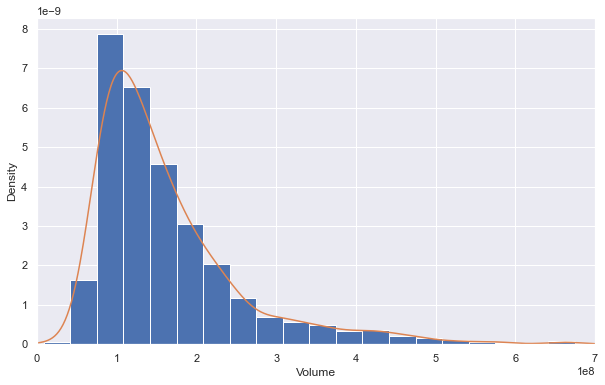

In [ ]:
#Plotting the distribution for Volume column
plt.figure(figsize=((10,6)))
ax=DJIA_table_data['Volume'].hist(bins=20, density=True)
DJIA_table_data['Volume'].plot(kind='density')
ax.set(xlabel='Volume')
plt.xlim(0,700000000)
plt.show()

In [ ]:
#checking skewness
DJIA_table_data.skew(axis=0)

Open        -0.072689
High        -0.063396
Low         -0.083832
Close       -0.074162
Volume       1.957286
Adj Close   -0.074162
dtype: float64

* Volume is highly and positively skewed
* All the other columns seem fine as their skewness is not below -1 and not above +1.

To deal with the skewness we are performing square root transformation on the volume column.

#### Sqrt Transformation

In [ ]:
#Square root tranformation
DJIA_table_data['Sqrt_Volume']=np.sqrt(DJIA_table_data['Volume'])

#checking skewness
print(DJIA_table_data.skew(axis=0))

Open          -0.072689
High          -0.063396
Low           -0.083832
Close         -0.074162
Volume         1.957286
Adj Close     -0.074162
Sqrt_Volume    1.179795
dtype: float64


In [ ]:
DJIA_table_data.agg([min,max])

,Date,Open,High,Low,Close,Volume,Adj Close,Sqrt_Volume
min,2008-08-08,6547.009766,6709.609863,6469.950195,6547.049805,8410000,6547.049805,2900.000000
max,2016-07-01,18315.060550,18351.359380,18272.560550,18312.390630,674920000,18312.390630,25979.222467


* By applying square root transformation Volume column becomes comparable to other columns but the data is still skewed.

<AxesSubplot:xlabel='Sqrt_Volume'>

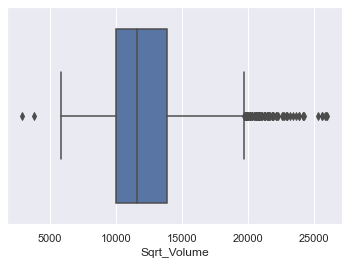

In [ ]:
#Checking the outliers in transformed data
sns.boxplot(x=DJIA_table_data['Sqrt_Volume'])

In [ ]:
#function to find outiers' index
def outlier_indices(data):
    Q1 = np.percentile(data, 25, interpolation = 'midpoint') 
    Q3 = np.percentile(data, 75, interpolation = 'midpoint') 
  
    IQR = Q3 - Q1 #Interquartile range

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    outlier_index =[]
    i=-1
    for x in data:
        i=i+1
        if ((x> up_lim) or (x<low_lim)):
             outlier_index.append(i)
    print("number of outliers in the data:",len(outlier_index))
    return(outlier_index)

In [ ]:
#Total Outliers and percentage in Sqrt_Volume
a=outlier_indices(DJIA_table_data['Sqrt_Volume'])
#Total Outliers percentage in Sqrt_Volume
print("percentage is: ",len(a)/DJIA_table_data.shape[0]* 100)

number of outliers in the data: 86
percentage is:  4.323780794369029


#### Log Transformation

In [ ]:
#Trying log transformation
DJIA_table_data['Log_Volume']=np.log(DJIA_table_data['Volume'])

#checking skewness
print(DJIA_table_data.skew(axis=0))

Open          -0.072689
High          -0.063396
Low           -0.083832
Close         -0.074162
Volume         1.957286
Adj Close     -0.074162
Sqrt_Volume    1.179795
Log_Volume     0.388841
dtype: float64


In [ ]:
DJIA_table_data.agg([min,max])

,Date,Open,High,Low,Close,Volume,Adj Close,Sqrt_Volume,Log_Volume
min,2008-08-08,6547.009766,6709.609863,6469.950195,6547.049805,8410000,6547.049805,2900.000000,15.944932
max,2016-07-01,18315.060550,18351.359380,18272.560550,18312.390630,674920000,18312.390630,25979.222467,20.330105


* By applying log transformation Volume data is no more skewed, but the column is not comparable to other columns.
* We will have to scale all the columns

<AxesSubplot:xlabel='Log_Volume'>

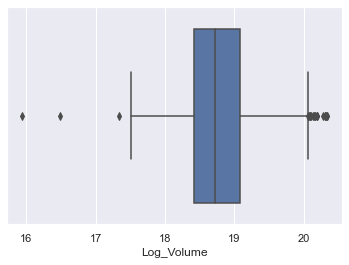

In [ ]:
#Checking the outliers
sns.boxplot(x=DJIA_table_data['Log_Volume'])

In [ ]:
#Total Outliers and percentage in log_Volume
b=outlier_indices(DJIA_table_data['Log_Volume'])
#Total Outliers percentage in Log_Volume
print("percentage is: ",len(b)/DJIA_table_data.shape[0]* 100)

number of outliers in the data: 21
percentage is:  1.0558069381598794


In [ ]:
DJIA_table_data.skew()

Open          -0.072689
High          -0.063396
Low           -0.083832
Close         -0.074162
Volume         1.957286
Adj Close     -0.074162
Sqrt_Volume    1.179795
Log_Volume     0.388841
dtype: float64

##### Comparing Sqrt and Log transformation, log transformation is removing the skewness of the column. So, the Log transformed column is retained. Cmparatively, the  Log tranformed column has less outliers than Sqrt transformed column.

In [ ]:
#dropping Sqrt_volume
DJIA_table_data.drop(['Sqrt_Volume'],axis=1,inplace=True)
#dropping adj close column because it is same as close column
DJIA_table_data.drop(['Adj Close'],axis=1,inplace=True)

In [ ]:
#Data 
DJIA_table_data.head()

,Date,Open,High,Low,Close,Volume,Log_Volume
0,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000,18.224179
1,2016-06-30,17712.75977,17930.60938,17711.80078,17929.99023,133030000,18.706085
2,2016-06-29,17456.01953,17704.50977,17456.01953,17694.67969,106380000,18.482528
3,2016-06-28,17190.50977,17409.72070,17190.50977,17409.72070,112190000,18.535704
4,2016-06-27,17355.21094,17355.21094,17063.08008,17140.24023,138740000,18.748112


---


---


### 3). News Text Data Cleaning

In [ ]:
#Reading news data
df = pd.read_csv("Combined_News_DJIA.csv",parse_dates=True)
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,8/8/2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,8/11/2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,8/12/2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [ ]:
#checking information about the news data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

All columns are of object type. Changing the type of Date column to Datetime.

In [ ]:
#converting 'Date' column type to Datetime
df['Date'] = df['Date']. astype('datetime64[ns]')
df.dtypes

Date     datetime64[ns]
Label             int64
Top1             object
Top2             object
Top3             object
Top4             object
Top5             object
Top6             object
Top7             object
Top8             object
Top9             object
Top10            object
Top11            object
Top12            object
Top13            object
Top14            object
Top15            object
Top16            object
Top17            object
Top18            object
Top19            object
Top20            object
Top21            object
Top22            object
Top23            object
Top24            object
Top25            object
dtype: object

#### Null values imputation

In [ ]:
#Checking Null values in the dataset
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

Three columns have 7 total null values. We can fill those values with the mode of the columns as the columns are of object types.

In [ ]:
#imputing missing values
#df.fillna(df.mode(), inplace=True)

df['Top25'].fillna(df['Top22'],inplace=True)
df['Top24'].fillna(df['Top22'],inplace=True)
df['Top23'].fillna(df['Top22'],inplace=True)
df.isnull().sum().sum()

0

No more missing values

#### Stripping White spaces

In [ ]:
l_col = df.columns.to_list() #columns which have only news features
l_col.remove("Date")
l_col.remove("Label")
print(l_col)

for i in l_col:
    df[i].str.strip()
df.head()

['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25']


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

#### Removing punctuation

In [ ]:
#importing string class
import string

#function to remove punctuations
def remove_punctuation(s):
    """removes punctuation from text"""
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    return s

for i in l_col:
    df[i]=df[i].apply(remove_punctuation)
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,bGeorgia downs two Russian warplanes as countr...,bBREAKING Musharraf to be impeached,bRussia Today Columns of troops roll into Sout...,bRussian tanks are moving towards the capital ...,bAfghan children raped with impunity UN offici...,b150 Russian tanks have entered South Ossetia ...,bBreaking Georgia invades South Ossetia Russia...,bThe enemy combatent trials are nothing but a ...,bGeorgian troops retreat from S Osettain capit...,bDid the US Prep Georgia for War with Russia,bRice Gives Green Light for Israel to Attack I...,bAnnouncingClass Action Lawsuit on Behalf of A...,bSoRussia and Georgia are at war and the NYTs ...,bChina tells Bush to stay out of other countri...,bDid World War III start today,bGeorgia Invades South Ossetia if Russia gets...,bAlQaeda Faces Islamist Backlash,bCondoleezza Rice The US would not act to prev...,bThis is a busy day The European Union has ap...,bGeorgia will withdraw 1000 soldiers from Iraq...,bWhy the Pentagon Thinks Attacking Iran is a B...,bCaucasus in crisis Georgia invades South Ossetia,bIndian shoe manufactory And again in a seri...,bVisitors Suffering from Mental Illnesses Bann...,bNo Help for Mexicos Kidnapping Surge
1,2008-08-11,1,bWhy wont America and Nato help us If they won...,bBush puts foot down on Georgian conflict,bJewish Georgian minister Thanks to Israeli tr...,bGeorgian army flees in disarray as Russians a...,bOlympic opening ceremony fireworks faked,bWhat were the Mossad with fraudulent New Zeal...,bRussia angered by Israeli military sale to Ge...,bAn American citizen living in SOssetia blames...,bWelcome To World War IV Now In High Definition,bGeorgias move a mistake of monumental proport...,bRussia presses deeper into Georgia US says re...,bAbhinav Bindra wins first ever Individual Oly...,b US ship heads for Arctic to define territory,bDrivers in a Jerusalem taxi station threaten ...,bThe French Team is Stunned by Phelps and the ...,bIsrael and the US behind the Georgian aggression,bDo not believe TV neither Russian nor Georgia...,bRiots are still going on in Montreal Canada b...,bChina to overtake US as largest manufacturer,bWar in South Ossetia PICS,bIsraeli Physicians Group Condemns State Torture,b Russia has just beaten the United States ove...,bPerhaps the question about the Georgia Russi...,bRussia is so much better at war,bSo this is what its come to trading sex for food
2,2008-08-12,0,bRemember that adorable 9yearold who sang at t...,bRussia ends Georgia operation,bIf we had no sexual harassment we would have ...,bAlQaeda is losing support in Iraq because of ...,bCeasefire in Georgia Putin Outmaneuvers the West,bWhy Microsoft and Intel tried to kill the XO ...,bStratfor The RussoGeorgian War and the Balanc...,bIm Trying to Get a Sense of This Whole Georgi...,bThe US military was surprised by the timing a...,bUS Beats War Drum as Iran Dumps the Dollar,bGorbachev Georgian military attacked the Sout...,bCNN use footage of Tskhinvali ruins to cover ...,bBeginning a war as the Olympics were opening ...,b55 pyramids as large as the Luxor stacked int...,bThe 11 Top Party Cities in the World,bUS troops still in Georgia did you know they ...,bWhy Russias response to Georgia was right,bGorbachev accuses US of making a serious blun...,bRussia Georgia and NATO Cold War Two,bRemember that adorable 62yearold who led your...,bWar in Georgia The Israeli connection,bAll signs point to the US encouraging Georgia...,bChristopher King argues that the US and NATO ...,bAmerica The New Mexico,bBBC NEWS AsiaPacific Extinction by man not ...


In [ ]:
#removing b from all the text
def remove_b(s):
    """removes b at the beginning from text"""
    if s[0]=="b":
        s = s[1:]
    return s

for i in l_col:
    df[i]=df[i].apply(remove_b)
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,Georgia downs two Russian warplanes as countri...,BREAKING Musharraf to be impeached,Russia Today Columns of troops roll into South...,Russian tanks are moving towards the capital o...,Afghan children raped with impunity UN officia...,150 Russian tanks have entered South Ossetia w...,Breaking Georgia invades South Ossetia Russia ...,The enemy combatent trials are nothing but a s...,Georgian troops retreat from S Osettain capita...,Did the US Prep Georgia for War with Russia,Rice Gives Green Light for Israel to Attack Ir...,AnnouncingClass Action Lawsuit on Behalf of Am...,SoRussia and Georgia are at war and the NYTs t...,China tells Bush to stay out of other countrie...,Did World War III start today,Georgia Invades South Ossetia if Russia gets ...,AlQaeda Faces Islamist Backlash,Condoleezza Rice The US would not act to preve...,This is a busy day The European Union has app...,Georgia will withdraw 1000 soldiers from Iraq ...,Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis Georgia invades South Ossetia,Indian shoe manufactory And again in a serie...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexicos Kidnapping Surge
1,2008-08-11,1,Why wont America and Nato help us If they wont...,Bush puts foot down on Georgian conflict,Jewish Georgian minister Thanks to Israeli tra...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks faked,What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in SOssetia blames ...,Welcome To World War IV Now In High Definition,Georgias move a mistake of monumental proporti...,Russia presses deeper into Georgia US says reg...,Abhinav Bindra wins first ever Individual Olym...,US ship heads for Arctic to define territory,Drivers in a Jerusalem taxi station threaten t...,The French Team is Stunned by Phelps and the 4...,Israel and the US behind the Georgian aggression,Do not believe TV neither Russian nor Georgian...,Riots are still going on in Montreal Canada be...,China to overtake US as largest manufacturer,War in South Ossetia PICS,Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States over...,Perhaps the question about the Georgia Russia...,Russia is so much better at war,So this is what its come to trading sex for food
2,2008-08-12,0,Remember that adorable 9yearold who sang at th...,Russia ends Georgia operation,If we had no sexual harassment we would have n...,AlQaeda is losing support in Iraq because of a...,Ceasefire in Georgia Putin Outmaneuvers the West,Why Microsoft and Intel tried to kill the XO 1...,Stratfor The RussoGeorgian War and the Balance...,Im Trying to Get a Sense of This Whole Georgia...,The US military was surprised by the timing an...,US Beats War Drum as Iran Dumps the Dollar,Gorbachev Georgian military attacked the South...,CNN use footage of Tskhinvali ruins to cover G...,Beginning a war as the Olympics were opening v...,55 pyramids as large as the Luxor stacked into...,The 11 Top Party Cities in the World,US troops still in Georgia did you know they w...,Why Russias response to Georgia was right,Gorbachev accuses US of making a serious blund...,Russia Georgia and NATO Cold War Two,Remember that adorable 62yearold who led your ...,War in Georgia The Israeli connection,All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America The New Mexico,BBC NEWS AsiaPacific Extinction by man not c...


In [ ]:
data=df.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,Georgia downs two Russian warplanes as countri...,BREAKING Musharraf to be impeached,Russia Today Columns of troops roll into South...,Russian tanks are moving towards the capital o...,Afghan children raped with impunity UN officia...,Russian tanks have entered South Ossetia w...,Breaking Georgia invades South Ossetia Russia ...,The enemy combatent trials are nothing but a s...,Georgian troops retreat from S Osettain capita...,Did the US Prep Georgia for War with Russia,Rice Gives Green Light for Israel to Attack Ir...,AnnouncingClass Action Lawsuit on Behalf of Am...,SoRussia and Georgia are at war and the NYTs t...,China tells Bush to stay out of other countrie...,Did World War III start today,Georgia Invades South Ossetia if Russia gets ...,AlQaeda Faces Islamist Backlash,Condoleezza Rice The US would not act to preve...,This is a busy day The European Union has app...,Georgia will withdraw soldiers from Iraq ...,Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis Georgia invades South Ossetia,Indian shoe manufactory And again in a serie...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexicos Kidnapping Surge
1,Why wont America and Nato help us If they wont...,Bush puts foot down on Georgian conflict,Jewish Georgian minister Thanks to Israeli tra...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks faked,What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in SOssetia blames ...,Welcome To World War IV Now In High Definition,Georgias move a mistake of monumental proporti...,Russia presses deeper into Georgia US says reg...,Abhinav Bindra wins first ever Individual Olym...,US ship heads for Arctic to define territory,Drivers in a Jerusalem taxi station threaten t...,The French Team is Stunned by Phelps and the ...,Israel and the US behind the Georgian aggression,Do not believe TV neither Russian nor Georgian...,Riots are still going on in Montreal Canada be...,China to overtake US as largest manufacturer,War in South Ossetia PICS,Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States over...,Perhaps the question about the Georgia Russia...,Russia is so much better at war,So this is what its come to trading sex for food
2,Remember that adorable yearold who sang at th...,Russia ends Georgia operation,If we had no sexual harassment we would have n...,AlQaeda is losing support in Iraq because of a...,Ceasefire in Georgia Putin Outmaneuvers the West,Why Microsoft and Intel tried to kill the XO ...,Stratfor The RussoGeorgian War and the Balance...,Im Trying to Get a Sense of This Whole Georgia...,The US military was surprised by the timing an...,US Beats War Drum as Iran Dumps the Dollar,Gorbachev Georgian military attacked the South...,CNN use footage of Tskhinvali ruins to cover G...,Beginning a war as the Olympics were opening v...,pyramids as large as the Luxor stacked into...,The Top Party Cities in the World,US troops still in Georgia did you know they w...,Why Russias response to Georgia was right,Gorbachev accuses US of making a serious blund...,Russia Georgia and NATO Cold War Two,Remember that adorable yearold who led your ...,War in Georgia The Israeli connection,All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America The New Mexico,BBC NEWS AsiaPacific Extinction by man not c...
3,US refuses Israel weapons to attack Iran report,When the president ordered to attack Tskhinval...,Israel clears troops who killed Reuters camer...,Britains policy of being tough on drugs is poi...,Body of year old found in trunk Latest rans...,China has moved million quake survivors int...,Bush announces Operation Get All Up In Russias...,Russian forces sink Georgian ships,The commander of a Navy air reconnaissance squ...,of CNN readers Russias action

In [ ]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,georgia downs two russian warplanes as countri...,breaking musharraf to be impeached,russia today columns of troops roll into south...,russian tanks are moving towards the capital o...,afghan children raped with impunity un officia...,russian tanks have entered south ossetia w...,breaking georgia invades south ossetia russia ...,the enemy combatent trials are nothing but a s...,georgian troops retreat from s osettain capita...,did the us prep georgia for war with russia,rice gives green light for israel to attack ir...,announcingclass action lawsuit on behalf of am...,sorussia and georgia are at war and the nyts t...,china tells bush to stay out of other countrie...,did world war iii start today,georgia invades south ossetia if russia gets ...,alqaeda faces islamist backlash,condoleezza rice the us would not act to preve...,this is a busy day the european union has app...,georgia will withdraw soldiers from iraq ...,why the pentagon thinks attacking iran is a ba...,caucasus in crisis georgia invades south ossetia,indian shoe manufactory and again in a serie...,visitors suffering from mental illnesses banne...,no help for mexicos kidnapping surge
1,why wont america and nato help us if they wont...,bush puts foot down on georgian conflict,jewish georgian minister thanks to israeli tra...,georgian army flees in disarray as russians ad...,olympic opening ceremony fireworks faked,what were the mossad with fraudulent new zeala...,russia angered by israeli military sale to geo...,an american citizen living in sossetia blames ...,welcome to world war iv now in high definition,georgias move a mistake of monumental proporti...,russia presses deeper into georgia us says reg...,abhinav bindra wins first ever individual olym...,us ship heads for arctic to define territory,drivers in a jerusalem taxi station threaten t...,the french team is stunned by phelps and the ...,israel and the us behind the georgian aggression,do not believe tv neither russian nor georgian...,riots are still going on in montreal canada be...,china to overtake us as largest manufacturer,war in south ossetia pics,israeli physicians group condemns state torture,russia has just beaten the united states over...,perhaps the question about the georgia russia...,russia is so much better at war,so this is what its come to trading sex for food
2,remember that adorable yearold who sang at th...,russia ends georgia operation,if we had no sexual harassment we would have n...,alqaeda is losing support in iraq because of a...,ceasefire in georgia putin outmaneuvers the west,why microsoft and intel tried to kill the xo ...,stratfor the russogeorgian war and the balance...,im trying to get a sense of this whole georgia...,the us military was surprised by the timing an...,us beats war drum as iran dumps the dollar,gorbachev georgian military attacked the south...,cnn use footage of tskhinvali ruins to cover g...,beginning a war as the olympics were opening v...,pyramids as large as the luxor stacked into...,the top party cities in the world,us troops still in georgia did you know they w...,why russias response to georgia was right,gorbachev accuses us of making a serious blund...,russia georgia and nato cold war two,remember that adorable yearold who led your ...,war in georgia the israeli connection,all signs point to the us encouraging georgia ...,christopher king argues that the us and nato a...,america the new mexico,bbc news asiapacific extinction by man not c...
3,us refuses israel weapons to attack iran report,when the president ordered to attack tskhinval...,israel clears troops who killed reuters camer...,britains policy of being tough on drugs is poi...,body of year old found in trunk latest rans...,china has moved million quake survivors int...,bush announces operation get all up in russias...,russian forces sink georgian ships,the commander of a navy air reconnaissance squ...,of cnn readers russias action

In [ ]:
#Combining all the news into one column
headlines=[]
for i in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in df.iloc[i,2:27]))#.iloc[,2:27] denotes columns from Top1 to Top 25

In [ ]:
headlines[0]#combined news

'Georgia downs two Russian warplanes as countries move to brink of war BREAKING Musharraf to be impeached Russia Today Columns of troops roll into South Ossetia footage from fighting YouTube Russian tanks are moving towards the capital of South Ossetia which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity UN official says  this is sick a three year old was raped and they do nothing 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets Breaking Georgia invades South Ossetia Russia warned it would intervene on SOs side The enemy combatent trials are nothing but a sham Salim Haman has been sentenced to 5 12 years but will be kept longer anyway just because they feel like it Georgian troops retreat from S Osettain capital presumably leaving several hundred people killed VIDEO Did the US Prep Georgia for War with Russia Rice Gives Green Light for Israel to Attack Iran Says US has no veto over Israeli 

In [ ]:
df["headlines"] = ""
df.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,headlines
0,2008-08-08,0,Georgia downs two Russian warplanes as countri...,BREAKING Musharraf to be impeached,Russia Today Columns of troops roll into South...,Russian tanks are moving towards the capital o...,Afghan children raped with impunity UN officia...,150 Russian tanks have entered South Ossetia w...,Breaking Georgia invades South Ossetia Russia ...,The enemy combatent trials are nothing but a s...,Georgian troops retreat from S Osettain capita...,Did the US Prep Georgia for War with Russia,Rice Gives Green Light for Israel to Attack Ir...,AnnouncingClass Action Lawsuit on Behalf of Am...,SoRussia and Georgia are at war and the NYTs t...,China tells Bush to stay out of other countrie...,Did World War III start today,Georgia Invades South Ossetia if Russia gets ...,AlQaeda Faces Islamist Backlash,Condoleezza Rice The US would not act to preve...,This is a busy day The European Union has app...,Georgia will withdraw 1000 soldiers from Iraq ...,Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis Georgia invades South Ossetia,Indian shoe manufactory And again in a serie...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexicos Kidnapping Surge,


In [ ]:
for i in range(len(headlines)):
    df["headlines"][i] = headlines[i]
df.head()

<ipython-input-33-d7d244d1ae42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["headlines"][i] = headlines[i]


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,headlines
0,2008-08-08,0,Georgia downs two Russian warplanes as countri...,BREAKING Musharraf to be impeached,Russia Today Columns of troops roll into South...,Russian tanks are moving towards the capital o...,Afghan children raped with impunity UN officia...,150 Russian tanks have entered South Ossetia w...,Breaking Georgia invades South Ossetia Russia ...,The enemy combatent trials are nothing but a s...,Georgian troops retreat from S Osettain capita...,Did the US Prep Georgia for War with Russia,Rice Gives Green Light for Israel to Attack Ir...,AnnouncingClass Action Lawsuit on Behalf of Am...,SoRussia and Georgia are at war and the NYTs t...,China tells Bush to stay out of other countrie...,Did World War III start today,Georgia Invades South Ossetia if Russia gets ...,AlQaeda Faces Islamist Backlash,Condoleezza Rice The US would not act to preve...,This is a busy day The European Union has app...,Georgia will withdraw 1000 soldiers from Iraq ...,Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis Georgia invades South Ossetia,Indian shoe manufactory And again in a serie...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexicos Kidnapping Surge,Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,Why wont America and Nato help us If they wont...,Bush puts foot down on Georgian conflict,Jewish Georgian minister Thanks to Israeli tra...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks faked,What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in SOssetia blames ...,Welcome To World War IV Now In High Definition,Georgias move a mistake of monumental proporti...,Russia presses deeper into Georgia US says reg...,Abhinav Bindra wins first ever Individual Olym...,US ship heads for Arctic to define territory,Drivers in a Jerusalem taxi station threaten t...,The French Team is Stunned by Phelps and the 4...,Israel and the US behind the Georgian aggression,Do not believe TV neither Russian nor Georgian...,Riots are still going on in Montreal Canada be...,China to overtake US as largest manufacturer,War in South Ossetia PICS,Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States over...,Perhaps the question about the Georgia Russia...,Russia is so much better at war,So this is what its come to trading sex for food,Why wont America and Nato help us If they wont...
2,2008-08-12,0,Remember that adorable 9yearold who sang at th...,Russia ends Georgia operation,If we had no sexual harassment we would have n...,AlQaeda is losing support in Iraq because of a...,Ceasefire in Georgia Putin Outmaneuvers the West,Why Microsoft and Intel tried to kill the XO 1...,Stratfor The RussoGeorgian War and the Balance...,Im Trying to Get a Sense of This Whole Georgia...,The US military was surprised by the timing an...,US Beats War Drum as Iran Dumps the Dollar,Gorbachev Georgian military attacked the South...,CNN use footage of Tskhinvali ruins to cover G...,Beginning a war as the Olympics were opening v...,55 pyramids as large as the Luxor stacked into...,The 11 Top Party Cities in the World,US troops still in Georgia did you know they w...,Why Russias response to Georgia was right,Gorbachev accuses US of making a serious blund...,Russia Georgia and NATO Cold War Two,Remember that adorable 62yearold who led your ...,War in Georgia The Israeli connection,All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America The New Mexico,BBC NEWS AsiaPacific Extinction by man not c...,Remember that adorable 9yearold who sang at th...
3,2008-08-13,0,US refuses Israel weapons to attack Iran report,When the president ordered to attack Tskhinval...,Israel clears troops who killed Reuter

In [ ]:
df.drop(l_col,axis=1, inplace=True)
df.head()

,Date,Label,headlines
0,2008-08-08,0,Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,Why wont America and Nato help us If they wont...
2,2008-08-12,0,Remember that adorable 9yearold who sang at th...
3,2008-08-13,0,US refuses Israel weapons to attack Iran repo...
4,2008-08-14,1,All the experts admit that we should legalise ...


---

### 4). Merging the Datasets on Date column

In [ ]:
#adding the combined news column to df and dropping all other text columns
new_data=DJIA_table_data.merge(df)
new_data.head()

,Date,Open,High,Low,Close,Volume,Log_Volume,Label,headlines
0,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000,18.224179,1,A 117yearold woman in Mexico City finally rece...
1,2016-06-30,17712.75977,17930.60938,17711.80078,17929.99023,133030000,18.706085,1,Jamaica proposes marijuana dispensers for tour...
2,2016-06-29,17456.01953,17704.50977,17456.01953,17694.67969,106380000,18.482528,1,Explosion At Airport In Istanbul Yemeni former...
3,2016-06-28,17190.50977,17409.72070,17190.50977,17409.72070,112190000,18.535704,1,2500 Scientists To Australia If You Want To Sa...
4,2016-06-27,17355.21094,17355.21094,17063.08008,17140.24023,138740000,18.748112,0,Barclays and RBS shares suspended from trading...


In [ ]:
new_data.rename(columns = {'headlines': 'News'}, inplace = True)

---

In [ ]:
new_data.sort_values(by=['Date'], inplace=True)#sorting data
new_data.reset_index(drop=True, inplace=True)
data_train=new_data.copy()

In [ ]:
data_train.head()

,Date,Open,High,Low,Close,Volume,Log_Volume,Label,News
0,2008-08-08,11432.08984,11759.95996,11388.04004,11734.32031,212830000,19.176004,0,Georgia downs two Russian warplanes as countri...
1,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,19.026034,1,Why wont America and Nato help us If they wont...
2,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,18.972207,0,Remember that adorable 9yearold who sang at th...
3,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,19.022535,0,US refuses Israel weapons to attack Iran repo...
4,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,18.889371,1,All the experts admit that we should legalise ...


In [ ]:
#dropping duplicates
data_train= data_train.drop_duplicates()

### 5). Sentiment Analysis

In [ ]:
# Importing TextBlob
from textblob import TextBlob

# Defining a function which returns polarity
def detect_polarity(text):
    """Returns Polarity"""
    return TextBlob(text).sentiment.polarity

# Defining a function which returns subjectivity
def detect_subjectivity(text):
    """Returns Subjectivity"""
    return TextBlob(text).sentiment.subjectivity

#polarity 
data_train['polarity']=data_train.News.apply(detect_polarity)

#subjectivity
data_train['subjectivity']= data_train.News.apply(detect_subjectivity)
data_train.head()

,Date,Open,High,Low,Close,Volume,Log_Volume,Label,News,polarity,subjectivity
0,2008-08-08,11432.08984,11759.95996,11388.04004,11734.32031,212830000,19.176004,0,Georgia downs two Russian warplanes as countri...,-0.048568,0.267549
1,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,19.026034,1,Why wont America and Nato help us If they wont...,0.109325,0.374806
2,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,18.972207,0,Remember that adorable 9yearold who sang at th...,-0.044302,0.536234
3,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,19.022535,0,US refuses Israel weapons to attack Iran repo...,0.005842,0.364021
4,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,18.889371,1,All the experts admit that we should legalise ...,0.035469,0.375099


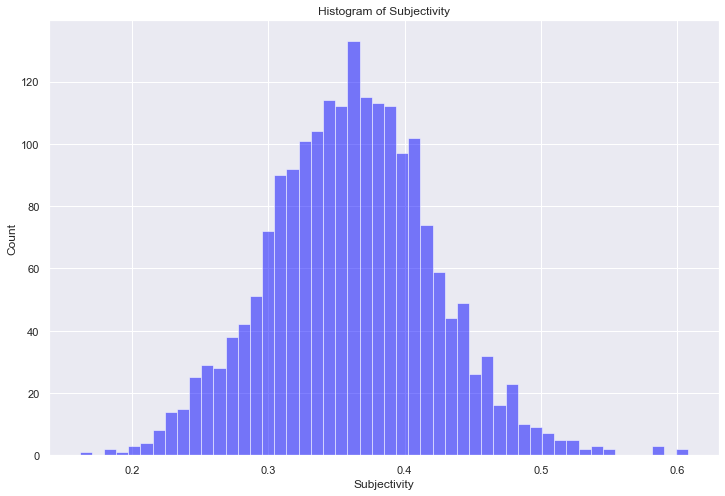

In [ ]:
# Distribution of subjectivity
num_bins = 50
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(data_train.subjectivity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of Subjectivity')
plt.show()

Almost all of the rows have subjectivity < 0.5. There data doesn't have any row with very high subjectivity

In [ ]:
max(data_train['subjectivity'])

0.6083333333333333

The maximum subjectivity any row has is 0.608. So, we can consider all the data as fairly subjective.

In [ ]:
# counting number of rows with more than 0 polarity
print('No of rows with more than 0 polarity: ',data_train[data_train['polarity']>=0]['polarity'].count())

# counting number of rows with less than 0 polarity
print('No of rows with less than 0 polarity: ',data_train[data_train['polarity']<0]['polarity'].count())

No of rows with more than 0 polarity:  1357
No of rows with less than 0 polarity:  632


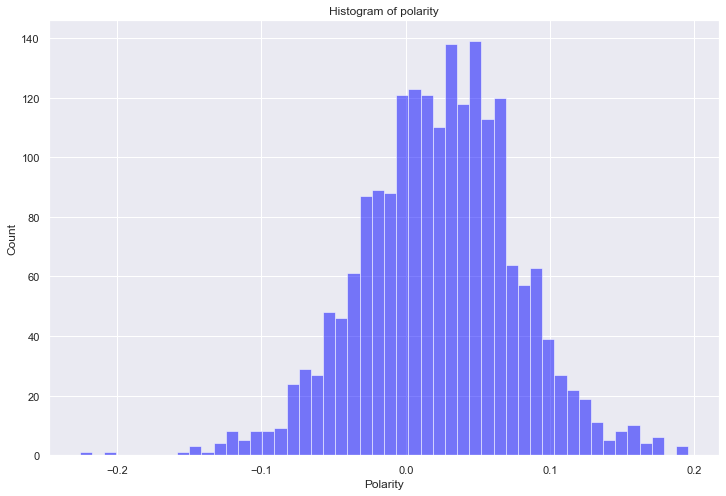

In [ ]:
# Distribution of polarity
num_bins = 50
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(data_train.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

Most polarity scores are above zero, meaning most of the news have positive sentiment in the data. 

Comparing this inference with the Labels.

In [ ]:
#counting no of rows with label value as 1 and 0
data_train['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

Data is almost equally divided for 1 and 0 labels. But the ratio of polarities showing positive or negative sentiment is different from the labels.

So, there might be cases when the price went up with negative market sentiment as well as positive market sentiment.
And there might be cases when the price went down with negative market sentiment as well as positive market sentiment. 

Let's cross check our assumption with polarity graph grouped by labels.

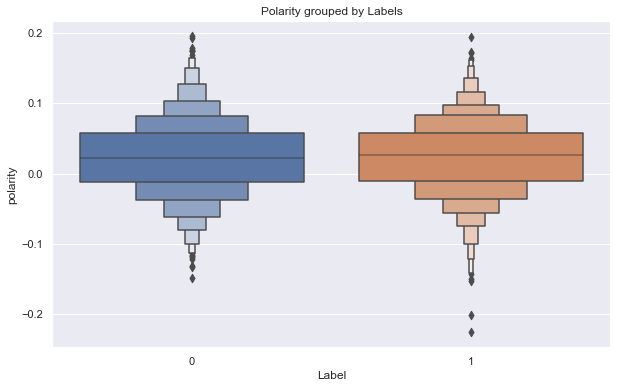

In [ ]:
#Polarity grouped by labels
plt.figure(figsize=(10,6))
sns.boxenplot(x='Label', y='polarity', data=data_train)
plt.title('Polarity grouped by Labels')
plt.show()

The price seems to go up more than go down with positive market sentiment.

In [ ]:
#News with low polarity
data_train[data_train['polarity']<=0].News.head()

0     Georgia downs two Russian warplanes as countri...
2     Remember that adorable 9yearold who sang at th...
7     Man arrested and locked up for five hours afte...
11    N Koreas Kim died in 2003 replaced by lookalik...
13    Photos of a 15yearold Iraqi suicide bomber who...
Name: News, dtype: object

In [ ]:
#News with Label value 0
data_train[data_train['Label']==0].News.head()

0    Georgia downs two Russian warplanes as countri...
2    Remember that adorable 9yearold who sang at th...
3     US refuses Israel weapons to attack Iran repo...
6    In an Afghan prison the majority of female pri...
7    Man arrested and locked up for five hours afte...
Name: News, dtype: object

In [ ]:
#news with lowest polarity and label value 1
data_train[(data_train['Label']==1) & (data_train['polarity']<=0)].News.head()

13    Photos of a 15yearold Iraqi suicide bomber who...
14    Military help for Georgia is a declaration of ...
20    A French judge has ordered two branches of Sci...
26    Pakistani Tribesmen Representing Half A Millio...
33    Russian woman caught redhanded drinking orange...
Name: News, dtype: object

#### Vader Sentiment Analysis

In [ ]:
#pip install vaderSentiment

# importing SentimentIntensityAnalyzer class
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()
data_train['compound'] = [analyzer.polarity_scores(x)['compound'] for x in data_train['News']]
data_train['neutral'] = [analyzer.polarity_scores(x)['neu'] for x in data_train['News']]
data_train['positive'] = [analyzer.polarity_scores(x)['pos'] for x in data_train['News']]
data_train['negative'] = [analyzer.polarity_scores(x)['neg'] for x in data_train['News']]

In [ ]:
data_train.head(3)

,Date,Open,High,Low,Close,Volume,Log_Volume,Label,News,polarity,subjectivity,compound,neutral,positive,negative
0,2008-08-08,11432.08984,11759.95996,11388.04004,11734.32031,212830000,19.176004,0,Georgia downs two Russian warplanes as countri...,-0.048568,0.267549,-0.9982,0.723,0.041,0.236
1,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,19.026034,1,Why wont America and Nato help us If they wont...,0.109325,0.374806,-0.9838,0.720,0.090,0.190
2,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,18.972207,0,Remember that adorable 9yearold who sang at th...,-0.044302,0.536234,-0.9679,0.817,0.056,0.127


In [ ]:
#adding sentiment column
def sentiment(data):
    if data<0:
        return('Negative')
    if data>0:
        return('Positive')
    if data==0:
        return('Neutral')

C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


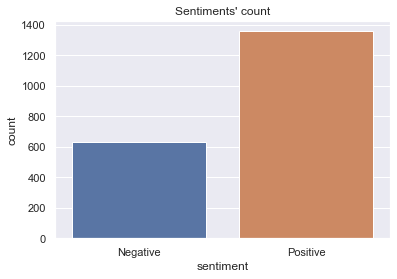

In [ ]:
#sentiment based on polarity
data_train['sentiment']=data_train.polarity.apply(sentiment)
sns.countplot(data_train.sentiment)
plt.title('Sentiments\' count')
plt.show()

C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sentiment Analysis Scatter Plot')

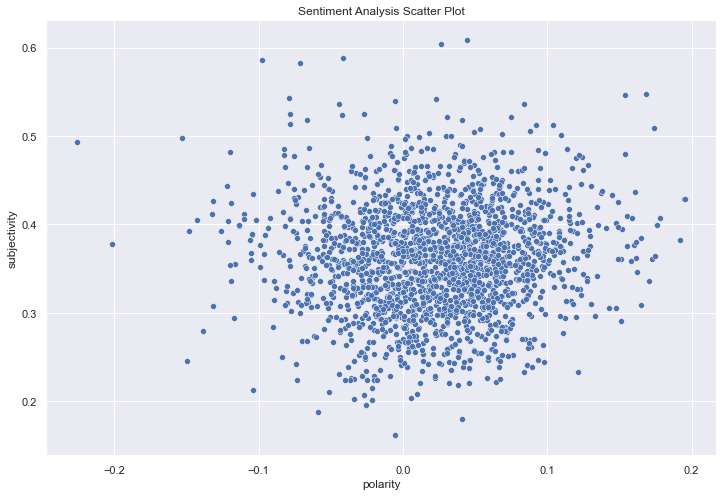

In [ ]:
#plotting polarity and subjectivity scatterplot
plt.figure(figsize=(12,8))
sns.scatterplot(data_train['polarity'], data_train['subjectivity'])
plt.title('Sentiment Analysis Scatter Plot')

Most datapoints seem to have values around neutral polarity and subjectivity.

### 6). Word Cloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


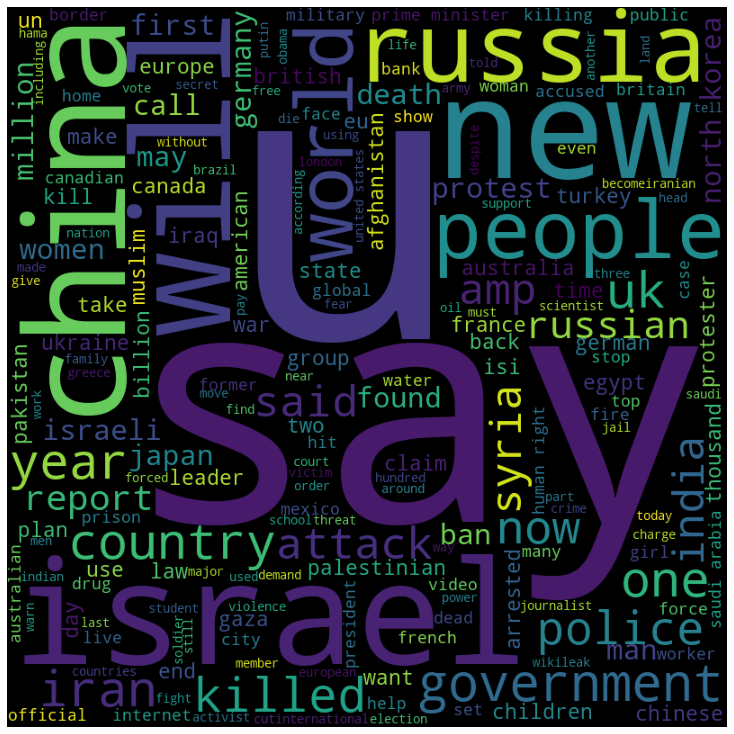

In [ ]:
import nltk
nltk.download('stopwords')
from wordcloud.wordcloud import WordCloud,STOPWORDS
import re
import os
comment_words = '' 
stop_words = set(STOPWORDS)
for i in data_train.News: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "
    
final_wordcloud = WordCloud(width = 800, height = 800, 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In the wordcloud, the highlighted words are mostly the names of countries, or words which relates to country level affairs like war, protest. 

---

### 7). EDA

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 1988
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1989 non-null   datetime64[ns]
 1   Open          1989 non-null   float64       
 2   High          1989 non-null   float64       
 3   Low           1989 non-null   float64       
 4   Close         1989 non-null   float64       
 5   Volume        1989 non-null   int64         
 6   Log_Volume    1989 non-null   float64       
 7   Label         1989 non-null   int64         
 8   News          1989 non-null   object        
 9   polarity      1989 non-null   float64       
 10  subjectivity  1989 non-null   float64       
 11  compound      1989 non-null   float64       
 12  neutral       1989 non-null   float64       
 13  positive      1989 non-null   float64       
 14  negative      1989 non-null   float64       
 15  sentiment     1989 non-null   object  

We have 2 object type columns. News & sentiment

In [ ]:
data_train.describe()

,Open,High,Low,Close,Volume,Log_Volume,Label,polarity,subjectivity,compound,neutral,positive,negative
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,13459.116049,13541.303173,13372.931728,13463.032255,1.628110e+08,18.778377,0.535445,0.022832,0.361127,-0.957571,0.770464,0.066203,0.163321
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,0.492643,0.498867,0.053416,0.060785,0.194379,0.042016,0.021061,0.038720
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,15.944932,0.000000,-0.225978,0.161332,-0.999500,0.587000,0.007000,0.062000
25%,10907.339840,11000.980470,10824.759770,10913.379880,1.000000e+08,18.420681,0.000000,-0.011721,0.320634,-0.996400,0.744000,0.051000,0.136000
50%,13022.049810,13088.110350,12953.129880,13025.580080,1.351700e+08,18.722044,1.000000,0.025014,0.361340,-0.993100,0.771000,0.065000,0.160000
75%,16477.699220,16550.070310,16392.769530,16478.410160,1.926000e+08,19.076126,1.000000,0.057958,0.400303,-0.985300,0.800000,0.079000,0.189000
max,18315.060550,18351.359380,18272.560550,18312.390630,6.749200e+08,20.330105,1.000000,0.195774,0.608333,0.991300,0.893000,0.154000,0.317000


Label column is the target column.

#### UNIVARIATE ANALYSIS

In [ ]:
data_train['price change']=data_train['Close']-data_train['Open']

C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

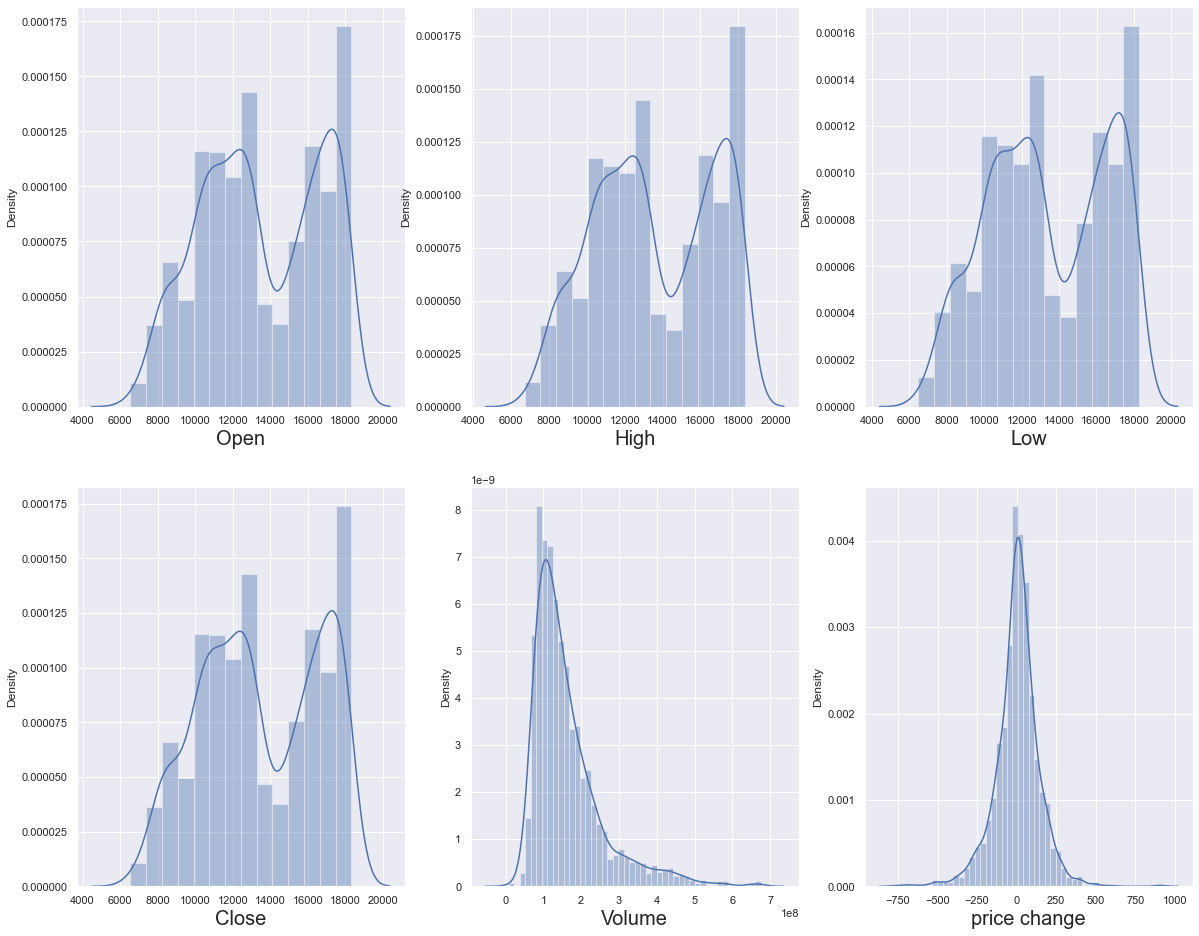

In [ ]:
#plots to see distributions of columns in data
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

data_train.set_index('Date',drop=True, inplace=True)
plt.figure(figsize=(20,25))
plotnumber = 1

cols=['Open','High','Low','Close','Volume','price change']
for column in data_train[cols]:
    if plotnumber<=6:   # as there are 6 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

All the numercial values have fine distributions. The graphs of Open, close, high and low seems weirdly similar.

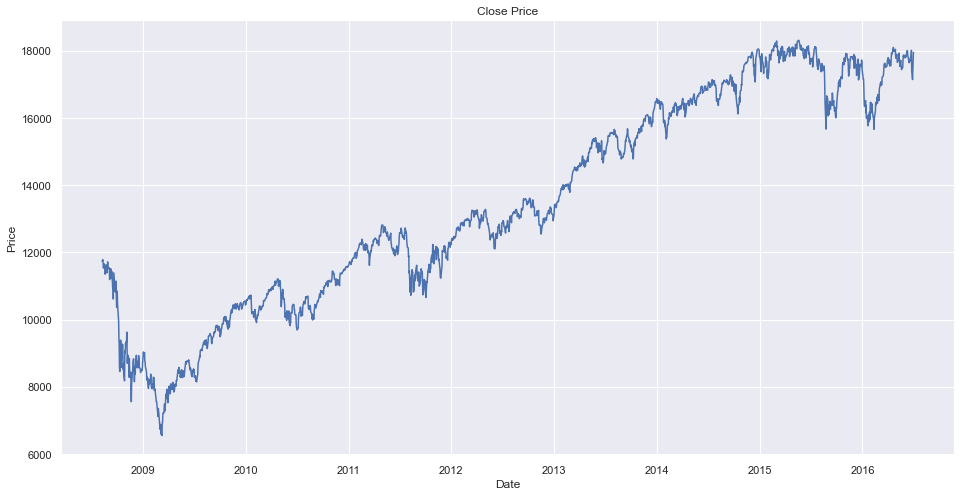

In [ ]:
#plotting line graph for close column
plt.figure(figsize=(16,8))
plt.plot(data_train['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price')
plt.show()

We can see that 2009 year has least closing prices and 2015-2016 has highest. The price is continuosly increasing over the years with little dips in between. The price was down for sometime in 2011 ending.

<AxesSubplot:xlabel='Date'>

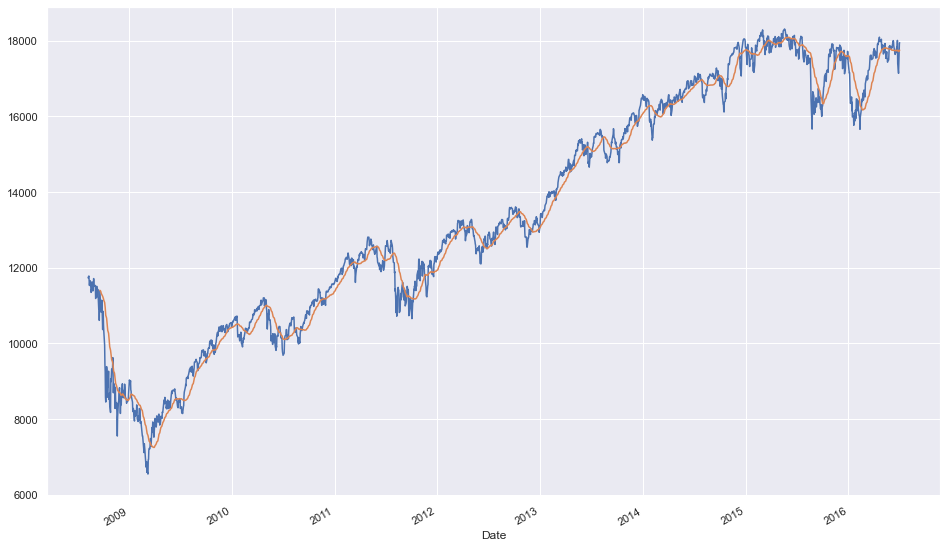

In [ ]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting the close price and a 30-day rolling mean of close price
data_train['Close'].plot()
data_train.rolling(window=30).mean()['Close'].plot()

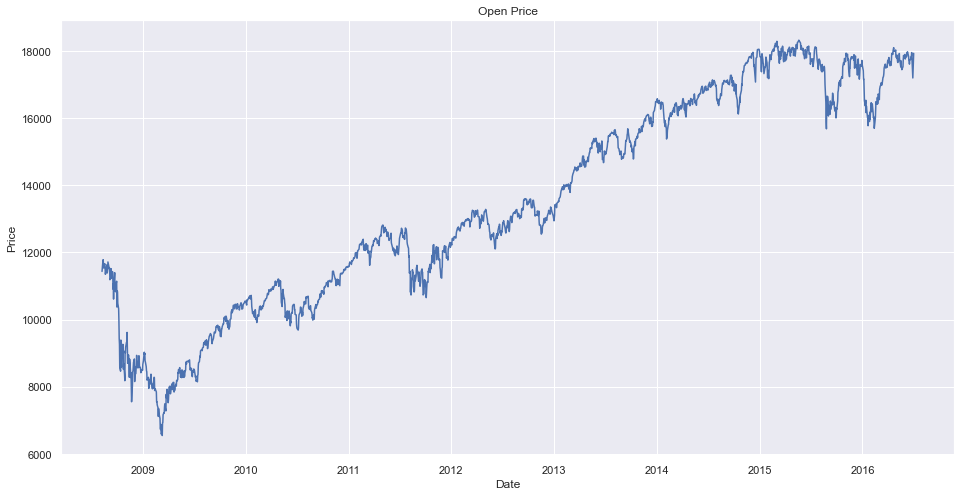

In [ ]:
#plotting line graph for close column
plt.figure(figsize=(16,8))
plt.plot(data_train['Open'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open Price')
plt.show()

We can see that 2009 year has least closing prices and 2015-2016 has highest. The price has continuosly increased over the years with little dips in between. The price was down for sometime in 2011 ending.

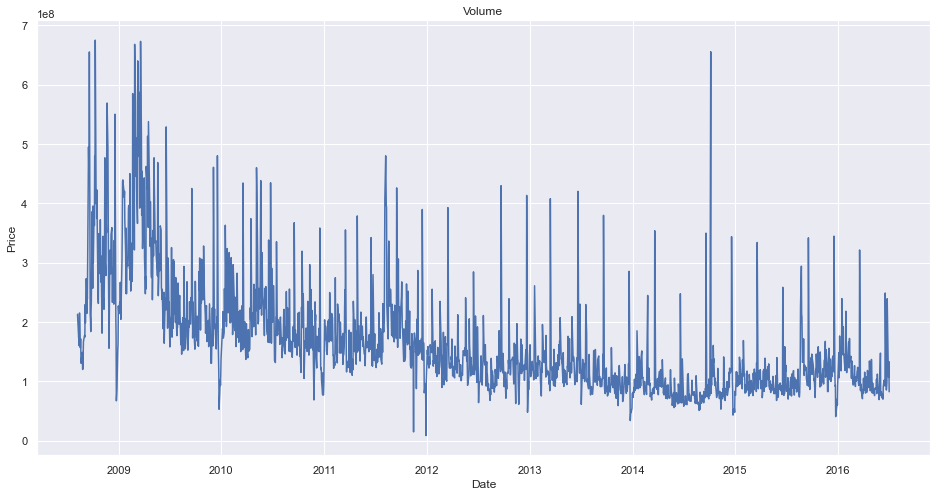

In [ ]:
#plotting line graph for close column
plt.figure(figsize=(16,8))
plt.plot(data_train['Volume'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Volume')
plt.show()

Volume keeps fluctuating but its mean is decreasing constantly and slowly over the years with a massive dip in 2011 ending and the beginning of 2012. 

***This dip might be the reason for lower open and close prices in 2011 ending.***

In [ ]:
#finding which day has highest opening price
data_train['Open'].idxmax()

Timestamp('2015-05-20 00:00:00')

7th July of 2014 has highest Opening price

In [ ]:
#finding which day has highest closing price
data_train['Close'].idxmax()

Timestamp('2015-05-19 00:00:00')

We can see that 3rd July 2014 has highest closing. And a few days after it highest open occured.


In [ ]:
#finding which day has least opening price
data_train['Open'].idxmin()

Timestamp('2009-03-10 00:00:00')

In [ ]:
#finding which day has least closing price
data_train['Close'].idxmin()

Timestamp('2009-03-09 00:00:00')

The same can be see here too that as the market closing price was least on 9th March 2009 its opening was least the later day on 10th March

In [ ]:
#which day had highest no.of tradings
data_train['Volume'].idxmax()

Timestamp('2008-10-10 00:00:00')

In [ ]:
#which day had least no.of tradings
data_train['Volume'].idxmin()

Timestamp('2011-12-29 00:00:00')

Most no.of shares are traded on 10th october 2008 and least no.of shares are traded on 29th december 2011.

#### BIVARIATE ANALYSIS

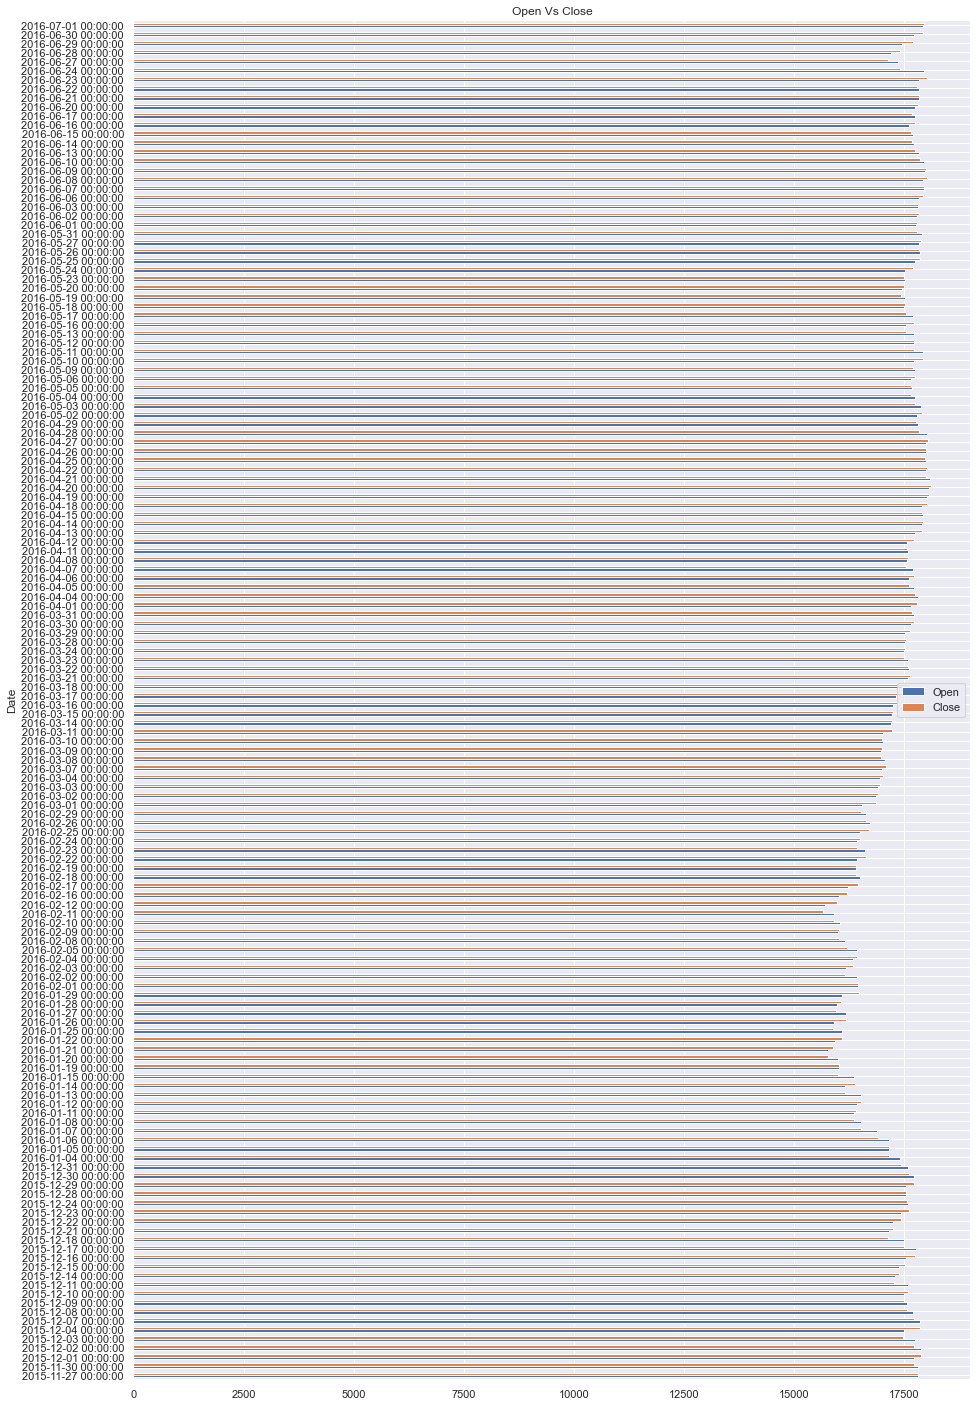

In [ ]:
#plotting open vs close prices for the year 2016 
ax=data_train[['Open','Close']].tail(150).plot(kind='barh',figsize=(15,25),title="Open Vs Close",ylabel="Price")

plt.show()

Above are the opening and closing prices for the year 2014

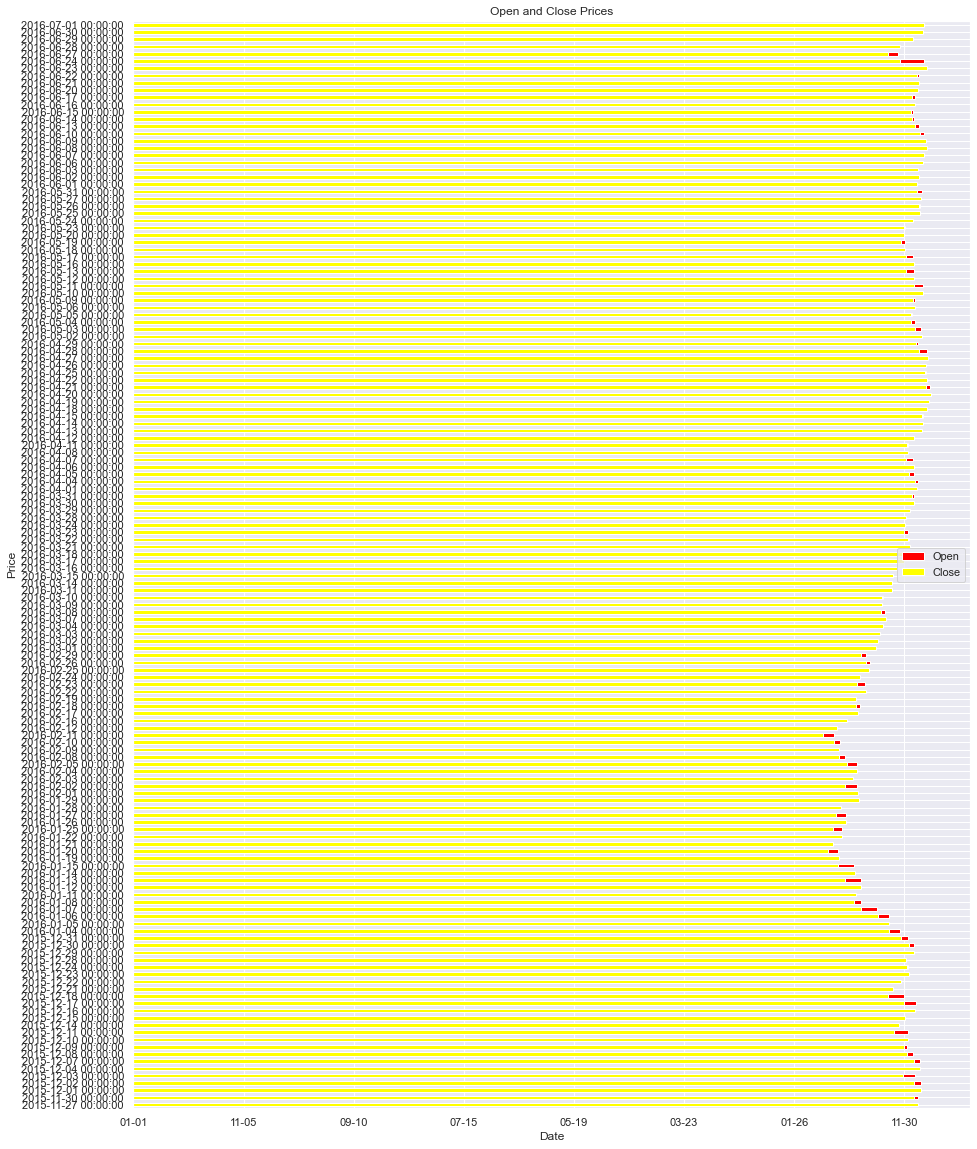

In [ ]:
#plotting same opening and closing prices of year 2016 but in the same bar column on on top of other.In this way we can easily find wchih of the two is greater for a particular day
ax=data_train[['Open']].tail(150).plot(kind='barh',color="red",figsize=(15,25))
data_train[['Close']].tail(150).plot(kind='barh',ax=ax, color="yellow",figsize=(15,20))
ax.set(xlabel="Date",
       ylabel="Price",
       title="Open and Close Prices")
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.show()

This graph also represents opening and closing prices for year 2014 but we can clearly see here that most of the days have closing prices greater than opening prices . We can observe that the ending plots in hte graph have mostly opening priices greater than closing prices implying the market probably suffered losses.

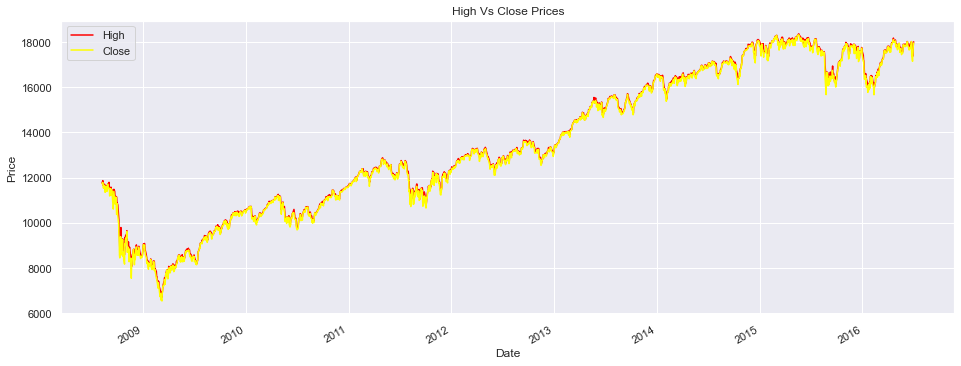

In [ ]:
#plotting high and closing prices
ax=data_train[['High']].plot(kind='line',color="red",figsize=(16,6))
data_train[['Close']].plot(kind='line',ax=ax, color="yellow",figsize=(16,6))
ax.set(xlabel="Date", ylabel="Price", title="High Vs Close Prices")
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

Above graph shows High Price Vs Closing Price. We can see very few days the market has same closing price ans high price

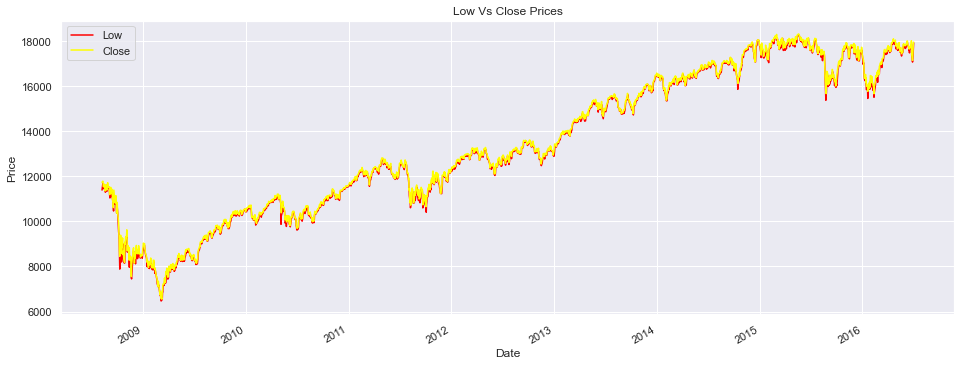

In [ ]:
#plotting low and closing prices
ax=data_train[['Low']].plot(kind='line',color="red",figsize=(16,6))
data_train[['Close']].plot(kind='line',ax=ax, color="yellow",figsize=(16,6))
ax.set(xlabel="Date",
       ylabel="Price",
       title="Low Vs Close Prices")
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

Above graph shows low Price Vs Closing Price.We can see that every day the market has a closing price equal to or more that the lowest price that day

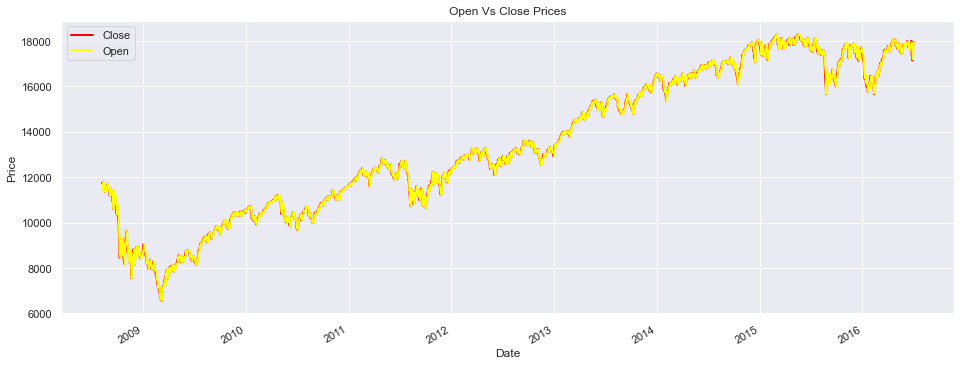

In [ ]:
#plotting open and closing prices
ax=data_train[['Close']].plot(kind='line',color="red",figsize=(16,30),linewidth=2)
data_train[['Open']].plot(kind='line',ax=ax, color="yellow",figsize=(16,6),linewidth=2)
ax.set(xlabel="Date",ylabel="Price",title="Open Vs Close Prices")
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

The above graph shows Open Price Vs Closing Price.We can see that both of them have a similar pattern

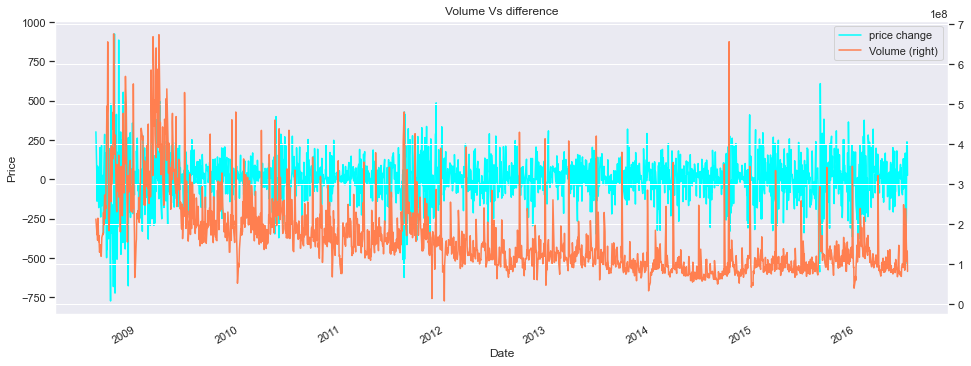

In [ ]:
#Checking if volume of shares traded and difference between opening and closing prices has any correlation
fig, ax = plt.subplots()
data_train[['price change']].plot(ax=ax,kind="line", color="cyan",figsize=(16,6))
data_train[['Volume']].plot(ax=ax, color="coral",secondary_y = True,figsize=(16,6))
ax.set(xlabel="Date",ylabel="Price",title="Volume Vs difference")
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

In [ ]:
#finding pearson correlation between volume and difference
from scipy.stats import pearsonr
list1 = data_train['price change']
list2 = data_train['Volume']
  
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.063


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Volume Vs Closing Price')]

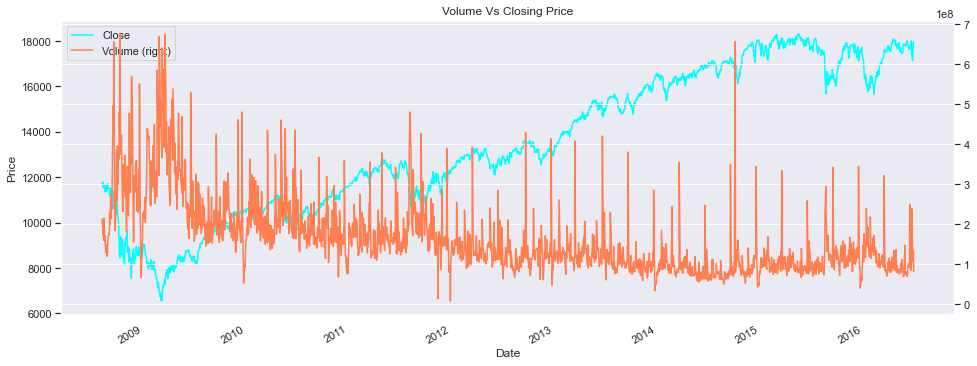

In [ ]:
#plotting closing prices and volume
fig, ax = plt.subplots()
data_train[['Close']].plot(ax=ax, color="cyan",figsize=(16,6))
data_train[['Volume']].plot(ax=ax, color="coral",secondary_y = True,figsize=(16,6))
ax.set(xlabel="Date",ylabel="Price", title="Volume Vs Closing Price")

We see that as the years pass the closing price is increasing while the volumes are decresing .The reason might be that as the years pass the cost of each share is increasing because of which the closing price is more though volumes are not much changing

In [ ]:
#pearson corelation between volumes and closing prices
list1 = data_train['Close']
list2 = data_train['Volume']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.694


We see that Volumes of shares traded and closing price are negatively correlated


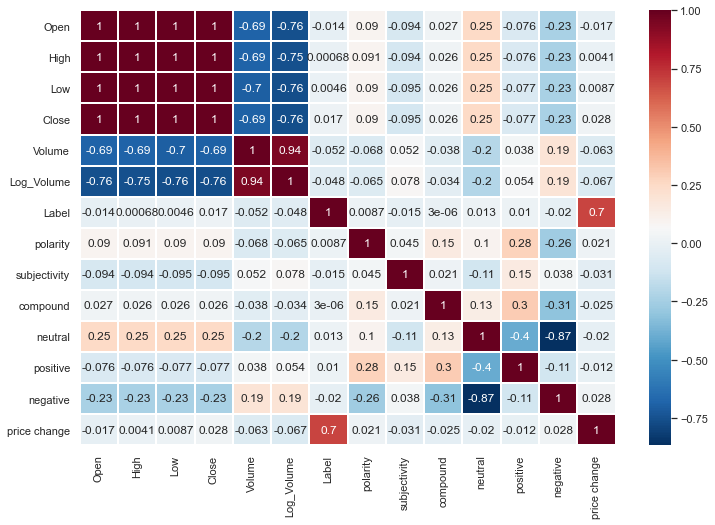

In [ ]:
#finding pearson correlation between each pair of variables and plotting them
corr = data_train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(12,8))  
corr_visual = sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdBu_r', annot=True, linewidth=0.2,ax=ax)

The price change feature has high correlation with Label. Open, High , Low, and Close are highly correlated with a correlation of 1.

In [ ]:
#finding day on which we have maximun difference between opening  and closing prices. This means we have highest profit in market
print("Date : ",data_train['price change'].idxmax())
print("Difference in Opening and closing price:",data_train['price change'].max())

Date :  2008-10-13 00:00:00
Difference in Opening and closing price: 925.1904300000006


In [ ]:
#news on the day which had highest profit
data_train.loc['10/13/2008','News']

'EU Bans the Incandescent Light Bulb AFP Paul Krugman wins Nobel Economics Prize Europe to US You messed up the rescue too Hindu Threat to Christians Convert or Flee Europe puts 23 trillion on line for banks almost 3 times the USA bailout Congratulations on your Nobel Prize in Economics Paul Krugman When can we get some damn privacy Governments lose data Up to 17m peoples data missing AFRICA Sexuallytransmitted grades kills quality education New Beijing Traffic Laws Take 800000 Cars Off the Road in China A Jamaican lottery scam draws in millions of US dollars every day providing Jamaican gangs with highcalibre weapons Terror bill 42day detention rejected Ringo too busy for autographs EU warns youth turn your MP3 players down For three decades the Free Aceh Movement fought for independence from Indonesia settling finally for autonomy  Now its founder long in exile comes home  North Korea restores UN monitoring of atom sitediplomats Aids in Africa The power of the pulpits message AskRedd

we see that the market had huge a profit on 13th october 2008 (largest difference between opening and closing prices)
The news that "Europe puts $2.3 trillion on line for banks,..." might have been the major reason for this.

In [ ]:
#finding day on which we have minimum difference between opening  and closing prices. This means we have highest loss in market
print("Date : ",data_train['price change'].idxmin())
print("Difference in Opening and closing price:",data_train['price change'].min())

Date :  2008-09-29 00:00:00
Difference in Opening and closing price: -774.1699200000003


In [ ]:
#news on the day which had highest loss
data_train.loc['9/29/2008','News']

'The Power Of Nightmares  BBC Part 1 Japan makes cars Saudi Arabia pumps oil China supplies socks and flatscreen TVs Whats Americas No1 export Debt Chinese officials called it a separatist attack new photos show Chinese officers attacking other Chinese officers with machetes Huge European bank and iinsurance giant fails  bailout of 112 billion euro 164 billion by 3 separate govts 111yearold woman murdered after being accused of witchcraft Belief in witchcraft is NOT just a harmless quirk British children as young as nine are being forced into marriage by their families nucking futs Israeli settlers threaten to kill British film crew curse Jesus  Video of an Israeli settler threatening a British film crew  Sniper shoots dead a prisoner INSIDE French jail before he could be quizzed by police over a murder Al Qaeda  the Database Extreme right emerges as strong force in Austria The Taliban have been engaged in secret talks about ending the conflict in Afghanistan in a wideranging peace pro

The market had a huge loss on 29th september 2008. These are the top 25 news headlines on that particular day. The headline that stated  "Huge European bank and iinsurance giant fail" might be a reason for this loss .the hurricane in Canada might be a minor reason too
We need to note a common point that there was a huge gain and loss when a news about banks in Europe are published 

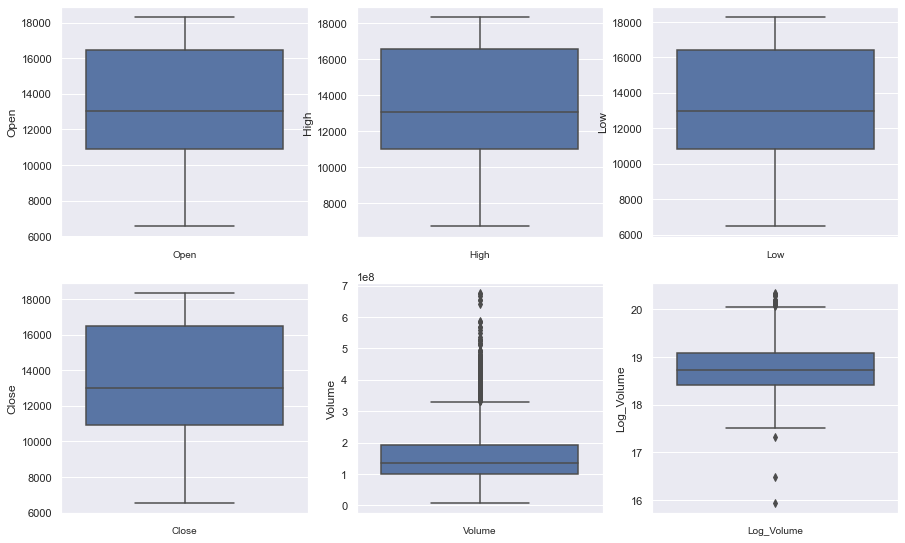

In [ ]:
#boxplots for all the variables
plt.figure(figsize=(15,50))
graph = 1

for column in data_train.columns[:6]:
    if graph<=30:    
        ax = plt.subplot(10,3,graph)
        sns.boxplot(y=data_train[column],orient='v')
        plt.xlabel(column,fontsize=10)      
    graph+=1
plt.show()

There are outliers in volume column, even after using log transformation to the column.

In [ ]:
c=outlier_indices(data_train['Log_Volume']) #using the customised function outlier_indices
print("indexes at which outliers are present",c)

number of outliers in the data: 21
indexes at which outliers are present [29, 44, 73, 74, 93, 134, 139, 140, 146, 147, 150, 152, 153, 154, 155, 173, 217, 825, 855, 1354, 1550]


The user input includes Open , Close, and News column only. So, we won't need volume column in training.

SO, let's not drop the columns.

---
**Training data will be fed to predict whether the price will go up(1) or down(0).**
* The input features will only be open, close and news. So we will keep only these columns and the columns which we have derived.

In [ ]:
#dropping extra columns
data_train.drop(['High','Low','Volume','Log_Volume','price change','sentiment','Label'],axis=1,inplace=True)
data_train.head()

,Open,Close,News,polarity,subjectivity,compound,neutral,positive,negative
Date,,,,,,,,,
2008-08-08,11432.08984,11734.32031,Georgia downs two Russian warplanes as countri...,-0.048568,0.267549,-0.9982,0.723,0.041,0.236
2008-08-11,11729.66992,11782.34961,Why wont America and Nato help us If they wont...,0.109325,0.374806,-0.9838,0.720,0.090,0.190
2008-08-12,11781.70020,11642.46973,Remember that adorable 9yearold who sang at th...,-0.044302,0.536234,-0.9679,0.817,0.056,0.127
2008-08-13,11632.80957,11532.95996,US refuses Israel weapons to attack Iran repo...,0.005842,0.364021,-0.9792,0.787,0.067,0.146
2008-08-14,11532.07031,11615.92969,All the experts admit that we should legalise ...,0.035469,0.375099,-0.9876,0.713,0.096,0.191


In [ ]:
data_train.to_csv('data.csv')

---

### 8). Conclusion

1.Volume and differnece feature which was created had many outliers

2.Difference feature created has very less correlation with all other features

3.Opening and Closing prices have similar pattern

4.All the original features other than volume are highly correlated to each other. We can even see this through graph as Open,Close,High,Low have similar patterns 

5.Starting of the 2009 year suffered market losses

6.Volume feature seems to be different from other features.

---